In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df = pd.concat([pd.Series(1,index=df.index, name = "bias"), df], axis=1)

In [4]:
X = df.drop(columns=["Species", "Weight"])
Y = df.iloc[:,2]

In [5]:
for column in X:
  X[column] = X[column]/np.max(X[column])

X.head()

,bias,Length1,Length2,Length3,Height,Width
0,1.0,0.393220,0.400631,0.441176,0.607691,0.493736
1,1.0,0.406780,0.414826,0.458824,0.658332,0.528814
2,1.0,0.405085,0.417981,0.457353,0.652941,0.576775
3,1.0,0.445763,0.457413,0.492647,0.671520,0.547224
4,1.0,0.449153,0.457413,0.500000,0.656433,0.630558


In [6]:
theta = np.array([0]*len(X.columns))
print(theta)

[0 0 0 0 0 0]


In [7]:
m = len(df)
print(m)

159


In [8]:
def hipotesis(theta, X):
  return theta*X

In [9]:
def funcion_costo(X, Y, theta):
  y1 = hipotesis(theta, X)
  y1 = np.sum(y1, axis=1)
  return sum(np.sqrt((y1-Y)**2))/(2*m)

In [10]:
def gradiente_descendiente(X, Y, theta, eta):
  y1 = hipotesis(theta, X)
  y1 = np.sum(y1, axis=1)
  for c in range(0, len(X.columns)):
    theta[c] = theta[c] - eta*(sum((y1-Y)*X.iloc[:,c])/len(X))
  j = funcion_costo(X, Y, theta) #variable que alberga la func de costo
  return j, theta

In [11]:
tol = 0.00001
j_ant = 0
J = [] #guarda la funcion de costo en cada iteracion
j_nuevo, theta = gradiente_descendiente(X,Y, theta, 0.05)
J.append(j_nuevo)
resta = np.abs(j_ant-j_nuevo)
while (resta >= tol):
  j_ant = j_nuevo
  j_nuevo, theta = gradiente_descendiente(X, Y, theta, 0.05)
  J.append(j_nuevo)
  resta = np.abs(j_nuevo-j_ant)

In [12]:
print(J)

[177.5379885925611, 159.75621685756022, 145.36323741659368, 134.54112018548233, 127.48426128914508, 122.3299998748105, 118.57514743392305, 115.50835801756925, 113.07242866181528, 111.56464725347075, 110.81914411160784, 110.29481835806887, 110.0138067364332, 109.78509514340101, 109.53696206018414, 109.35288003091682, 109.21346071557873, 109.07404140024056, 108.95838226003289, 108.73894953491948, 108.51951680980608, 108.3507312802614, 108.22399884590583, 108.03759101918155, 107.8599540384486, 107.69511490932248, 107.53232630194171, 107.37491025612157, 107.21749421030142, 107.06007816448127, 106.91297467907603, 106.76739474560154, 106.6346845741413, 106.5022870249144, 106.36988947568751, 106.08969318432224, 105.80949689295696, 105.52930060159171, 105.24910431022644, 104.96890801886113, 104.68871172749584, 104.40851543613061, 104.1283191447653, 103.84812285340008, 103.56792656203481, 103.28773027066954, 103.00753397930421, 102.727337687939, 102.44714139657373, 102.16694510520838, 101.88674

In [13]:
print(j_nuevo)

81.50290730661457


In [14]:
print(resta)

0.0


In [15]:
print(theta)

[-59 189 186 179 149 289]


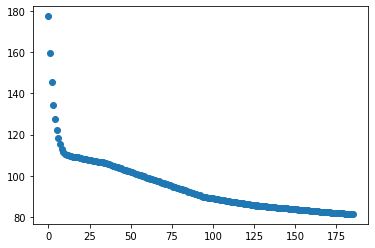

In [16]:
plt.figure()
plt.scatter(x=list(range(0, len(J))), y = J)
plt.show()